<ipython-input-1-eead9a08a137>:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-1-eead9a08a137>:38: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


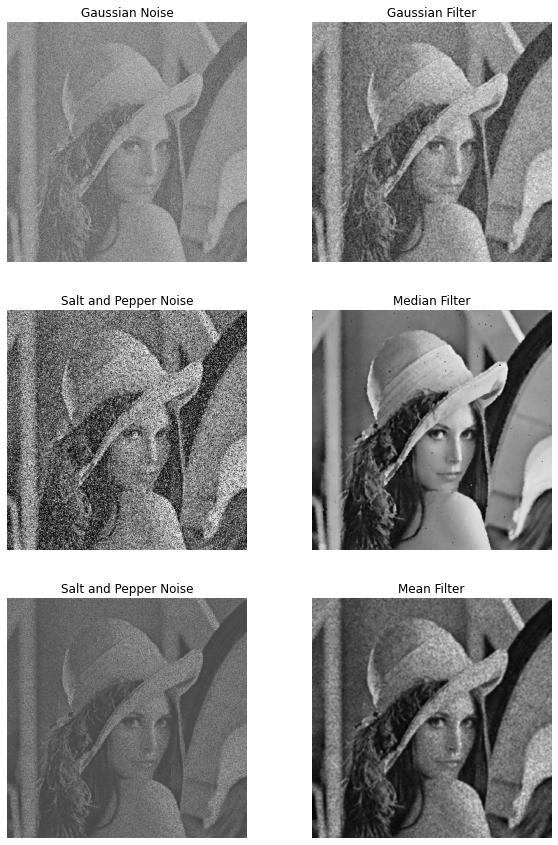

In [ ]:
#importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

#function to add noise to the image
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col))
        gauss = gauss.reshape(row,col)
        noisy = image + gauss
        return noisy
    elif noise_typ =="speckle":
        row,col = image.shape
        gauss = np.random.randn(row,col)*0.5
        gauss = gauss.reshape(row,col)        
        noisy = image + image * gauss
        return noisy
    else :
        row,col = image.shape
        s_vs_p = 0.5
        amount = 0.5
        out = np.copy(image)

        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1


        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out

#read and preprocess image
img = cv2.imread('lena.png', 0) 
img = img/255.
row,col = img.shape
#image plots
fig = plt.figure(figsize=(10,15))

#GAUSSIAN NOISE
img_gauss = noisy("gauss", img)
img_gauss_filtered = cv2.GaussianBlur(img_gauss, (7, 7), 1)

# Image with Gaussian noise
fig.add_subplot(3, 2, 1)
plt.imshow(img_gauss, cmap = 'gray')
plt.axis('off')
plt.title("Gaussian Noise")

# Image with Gaussian filter
fig.add_subplot(3, 2, 2)
plt.imshow(img_gauss_filtered, cmap = 'gray')
plt.axis('off')
plt.title("Gaussian Filter")


#SALT AND PEPPER NOISE
img_salt_pepper = noisy("salt_pepper", img)
img_salt_pepper = img_salt_pepper.astype('float32')
img_median_filtered = cv2.medianBlur(img_salt_pepper, 5)


fig.add_subplot(3, 2, 3)
plt.imshow(img_salt_pepper, cmap = 'gray')
plt.axis('off')
plt.title("Salt and Pepper Noise")

fig.add_subplot(3, 2, 4)
plt.imshow(img_median_filtered, cmap = 'gray')
plt.axis('off')
plt.title("Median Filter")


#SPECKLE NOISE
img_speckle = noisy("speckle", img)
img_filtered_mean = cv2.blur(img_speckle , (5, 5))

fig.add_subplot(3, 2, 5)
plt.imshow(img_speckle, cmap = 'gray')
plt.axis('off')
plt.title("Salt and Pepper Noise")

fig.add_subplot(3, 2, 6)
plt.imshow(img_filtered_mean, cmap = 'gray')
plt.axis('off')
plt.title("Mean Filter")

plt.show()